Part 1
Question 2:

Question 1:
1. The analysis is quite sensitive to outlier and the size of the smallest group must be larger than the number of predictor variables.

Multivariate normality: Independant normal variables.

Inpependence: Participants are assumed to be randomly sampled.

2. Observation of each class is drawn from a normal distribution.

Assumes each class has it's own covariance matrix.

3. Assumes a certain distance evaluation has been chosen (euclidian, manhattan, etc.) That the k chosen is smaller than the smallest class. (This I wrote on my own, not sure if there is more to this).

4. CART does not seem to have any initial assumptions.

Question 2:

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from copy import deepcopy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, top_k_accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss, f1_score, roc_auc_score

C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[3, 3], cov=covariance_1, size=(400))
C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[3, 3], cov=covariance_1, size=(400))
C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[3, 3], cov=covariance_1, size=(400))
C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[3, 3], cov=covariance_1, size=(400))
C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:6: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[3, 3], cov=covari

mean_cart=0.9256249999999999, standard_dev_cart=0.03365147656492951
mean_qda=0.9525, standard_dev_qda=0.034141250709369166


C:\Users\anton\AppData\Local\Temp/ipykernel_25644/4000177085.py:50: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k', label='QDA')


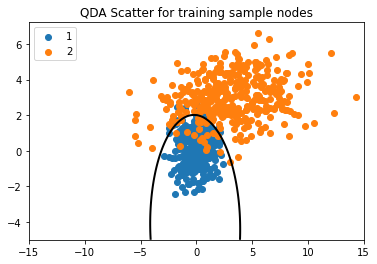

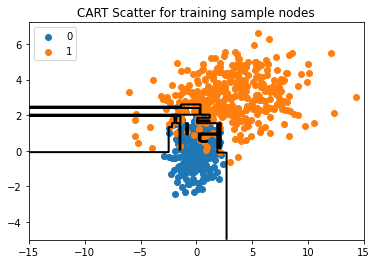

In [2]:
values_qda = []
values_cart = []
for _ in range(20):
    X1 = np.random.standard_normal((2, 400))
    covariance_1 = [[10, 1],[-2, 1]]
    X2 = np.random.multivariate_normal(mean=[3, 3], cov=covariance_1, size=(400))
    X2 = np.transpose(X2)

    train_X1 = X1[:, :360]
    test_X1 = X1[:, 360:]
    train_X2 = X2[:, :360]
    test_X2 = X2[:, 360:]

    X_0_train = np.vstack((train_X1[0,:], train_X2[0,:])).flatten()
    X_1_train = np.vstack((train_X1[1,:], train_X2[1,:])).flatten()
    X_train = np.zeros((720, 3))
    X_train[:, 0] = X_0_train
    X_train[:, 1] = X_1_train
    X_train[:360, 2] = 0
    X_train[360:, 2] = 1 
    X_0_train = np.vstack((test_X1[0,:], test_X2[0,:])).flatten()
    X_1_train = np.vstack((test_X1[1,:], test_X2[1,:])).flatten()
    X_test = np.zeros((80, 3))
    X_test[:, 0] = X_0_train
    X_test[:, 1] = X_1_train
    X_test[:40, 2] = 0
    X_test[40:, 2] = 1 
    np.random.shuffle(X_test)
    np.random.shuffle(X_train)

    model_qda = QuadraticDiscriminantAnalysis()
    model_cart = DecisionTreeClassifier()
    model_qda.fit(X_train[:, :2], X_train[:, 2:].ravel())
    model_cart.fit(X_train[:, :2], X_train[:, 2:].ravel())
    prediction_qda = model_qda.predict(X_test[:, :2])
    prediction_cart = model_cart.predict(X_test[:, :2])
    values_qda.append(accuracy_score(prediction_qda, X_test[:, 2:]))
    values_cart.append(accuracy_score(prediction_cart, X_test[:, 2:]))
mean_qda = np.mean(values_qda)
mean_cart = np.mean(values_cart)
standard_dev_qda = np.std(values_qda)
standard_dev_cart = np.std(values_cart)
print(f'{mean_cart=}, {standard_dev_cart=}')
print(f'{mean_qda=}, {standard_dev_qda=}')

# Create the line
xx, yy = np.meshgrid(np.linspace(-15, 15, 400), np.linspace(-5, 5, 400))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model_qda.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k', label='QDA')

plt.scatter(train_X1[0], train_X1[1], label="1")
plt.scatter(train_X2[0], train_X2[1], label="2")
plt.legend()
plt.title('QDA Scatter for training sample nodes')
plt.show()

zz_cart = model_cart.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_cart, [0.5], linewidths=2., colors='k')
plt.scatter(train_X1[0], train_X1[1], label="0")
plt.scatter(train_X2[0], train_X2[1], label="1")
plt.legend()
plt.title('CART Scatter for training sample nodes')
plt.show()


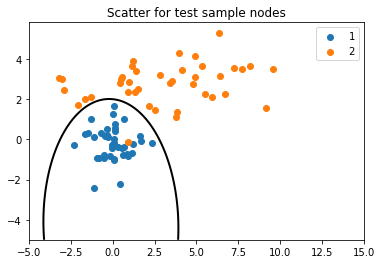

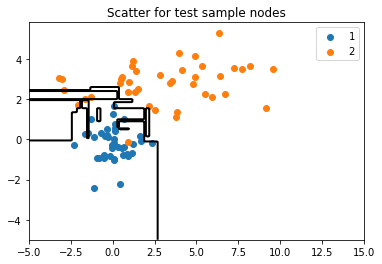

In [3]:
plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model_qda.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample nodes')
plt.show()


plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
zz_qda = model_cart.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample nodes')
plt.show()

Part 2 - CART

In [4]:
n_train_values = 800
n_train_values_part = int(n_train_values/4)
n_test_values = 200
n_test_values_part = int(n_test_values/4)
X_train = np.zeros((n_train_values, 3))
X_test = np.zeros((n_test_values, 3))


mean_cart=0.99075, standard_dev_cart=0.010985786271359925
mean_qda=0.9794999999999998, standard_dev_qda=0.014133294025102583


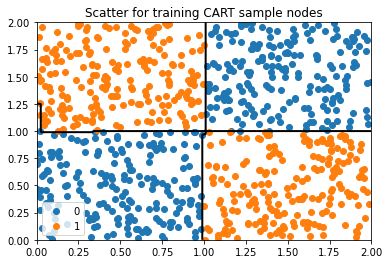

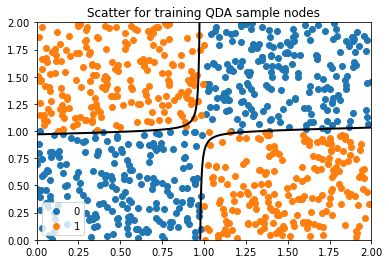

In [5]:
# Insert the different ranges
values_cart = []
values_qda = []
for _ in range(20):
    X_train[0:n_train_values_part, 0] = np.random.uniform(0, 1, size=n_train_values_part)
    X_train[0:n_train_values_part, 1] = np.random.uniform(0, 1, size=n_train_values_part)
    X_train[0:n_train_values_part, 2] = 0
    X_test[0:n_test_values_part, 0] =    np.random.uniform(0, 1, size=n_test_values_part)
    X_test[0:n_test_values_part, 1] =    np.random.uniform(0, 1, size=n_test_values_part)
    X_test[0:n_test_values_part, 2] = 0
    X_train[n_train_values_part:n_train_values_part*2, 0] = np.random.uniform(0, 1, size=n_train_values_part)
    X_train[n_train_values_part:n_train_values_part*2, 1] = np.random.uniform(1, 2, size=n_train_values_part)
    X_train[n_train_values_part:n_train_values_part*2, 2] = 1
    X_test[n_test_values_part:n_test_values_part*2, 0] =    np.random.uniform(0, 1, size=n_test_values_part)
    X_test[n_test_values_part:n_test_values_part*2, 1] =    np.random.uniform(1, 2, size=n_test_values_part)
    X_test[n_test_values_part:n_test_values_part*2, 2] = 1
    X_train[n_train_values_part*2:n_train_values_part*3, 0] = np.random.uniform(1, 2, size=n_train_values_part)
    X_train[n_train_values_part*2:n_train_values_part*3, 1] = np.random.uniform(0, 1, size=n_train_values_part)
    X_train[n_train_values_part*2:n_train_values_part*3, 2] = 1
    X_test[n_test_values_part*2:n_test_values_part*3, 0] =    np.random.uniform(1, 2, size=n_test_values_part)
    X_test[n_test_values_part*2:n_test_values_part*3, 1] =    np.random.uniform(0, 1, size=n_test_values_part)
    X_test[n_test_values_part*2:n_test_values_part*3, 2] = 1
    X_train[n_train_values_part*3:n_train_values_part*4, 0] = np.random.uniform(1, 2, size=n_train_values_part)
    X_train[n_train_values_part*3:n_train_values_part*4, 1] = np.random.uniform(1, 2, size=n_train_values_part)
    X_train[n_train_values_part*3:n_train_values_part*4, 2] = 0
    X_test[n_test_values_part*3:n_test_values_part*4, 0] =    np.random.uniform(1, 2, size=n_test_values_part)
    X_test[n_test_values_part*3:n_test_values_part*4, 1] =    np.random.uniform(1, 2, size=n_test_values_part)
    X_test[n_test_values_part*3:n_test_values_part*4, 2] = 0
    np.random.shuffle(X_train)
    np.random.shuffle(X_test)

    model = DecisionTreeClassifier()
    model2 = QuadraticDiscriminantAnalysis()
    model = model.fit(X_train[:, :2], X_train[:, 2:].ravel())
    model2 = model2.fit(X_train[:, :2], X_train[:, 2:].ravel())

    X_train_0 = np.array([row[:2] for row in X_train if row[2] == 0])
    X_train_1 = np.array([row[:2] for row in X_train if row[2] == 1])
    X_test_0 = np.array([row[:2] for row in X_train if row[2] == 0])
    X_test_1 = np.array([row[:2] for row in X_train if row[2] == 1])

    prediction_cart = model.predict(X_test[:, :2])
    prediction_qda = model2.predict(X_test[:, :2])


    #print(f'The prediction correctness for CART for test_values: {accuracy_score(prediction_cart, X_test[:, 2:])}%')
    #print(f'The prediction correctness for QDA for test_values: {accuracy_score(prediction_qda, X_test[:, 2:])}%')
    #print(sum(X_test[:, 2:]))
    values_cart.append(accuracy_score(prediction_cart, X_test[:, 2:]))
    values_qda.append(accuracy_score(prediction_qda, X_test[:, 2:]))
mean_cart = np.mean(values_cart)
standard_dev_cart = np.std(values_cart)
mean_qda = np.mean(values_qda)
standard_dev_qda = np.std(values_qda)
print(f'{mean_cart=}, {standard_dev_cart=}')
print(f'{mean_qda=}, {standard_dev_qda=}')
xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for training CART sample nodes')
plt.show()

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for training QDA sample nodes')
plt.show()

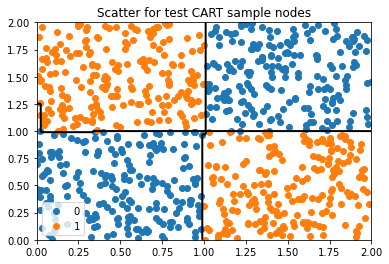

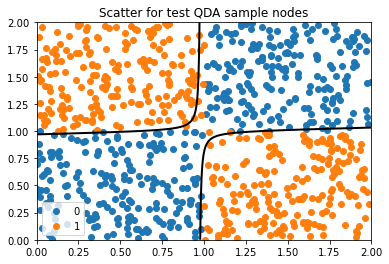

In [6]:
xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_cart = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_cart, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test CART sample nodes')
plt.show()

plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test QDA sample nodes')
plt.show()


In [7]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

uci_bc_data = uci_bc_data.sample(frac=1).reset_index(drop=True)
y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [8]:
print(f'number of Bs:{len(y[y==0])=}, number of Ms:{len(y[y==1])=}')
print(uci_bc_data)
print(f'The features seem to be numerical')
print(f'Some of them have the same scale, but some probably need to be scaled')

number of Bs:len(y[y==0])=357, number of Ms:len(y[y==1])=212
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           B       11.710         16.67           74.72      423.6   
1           B       12.560         19.07           81.92      485.8   
2           B       10.030         21.28           63.19      307.3   
3           B        9.742         19.12           61.93      289.7   
4           B       10.880         15.62           70.41      358.9   
..        ...          ...           ...             ...        ...   
564         M       19.530         32.47          128.00     1223.0   
565         M       11.840         18.70           77.93      440.6   
566         M       12.830         22.33           85.26      503.2   
567         M       16.260         21.88          107.50      826.8   
568         B       11.430         15.39           73.06      399.8   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0      

In [9]:
# Closer look at means and variance
for i in uci_bc_data:
    if i == 'diagnosis':
        continue
    mean_i = np.mean(uci_bc_data[i])
    var_i = np.var(uci_bc_data[i])
    print(f'{i}: mean={mean_i:.4f}, var={var_i:.4f}')

radius_mean: mean=14.1273, var=12.3971
texture_mean: mean=19.2896, var=18.4664
perimeter_mean: mean=91.9690, var=589.4028
area_mean: mean=654.8891, var=123625.9031
smoothness_mean: mean=0.0964, var=0.0002
compactness_mean: mean=0.1043, var=0.0028
concavity_mean: mean=0.0888, var=0.0063
concave_points_mean: mean=0.0489, var=0.0015
symmetry_mean: mean=0.1812, var=0.0008
fractal_dimension_mean: mean=0.0628, var=0.0000
radius_se: mean=0.4052, var=0.0768
texture_se: mean=1.2169, var=0.3038
perimeter_se: mean=2.8661, var=4.0807
area_se: mean=40.3371, var=2065.7946
smoothness_se: mean=0.0070, var=0.0000
compactness_se: mean=0.0255, var=0.0003
concavity_se: mean=0.0319, var=0.0009
concave_points_se: mean=0.0118, var=0.0000
symmetry_se: mean=0.0205, var=0.0001
fractal_dimension_se: mean=0.0038, var=0.0000
radius_worst: mean=16.2692, var=23.3192
texture_worst: mean=25.6772, var=37.7101
perimeter_worst: mean=107.2612, var=1127.1464
area_worst: mean=880.5831, var=323597.6709
smoothness_worst: mean

In [10]:
def accuracy(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return (tp+tn)/sum(cm.ravel())

def sensitivity(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return tp/(tp+tn)

def specificity(cm: np.array) -> float:
    tn, fp, _, _ = cm.ravel()
    return tn/(tn+fp)

def precision(cm: np.array) -> float:
    _, fp, _, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm: np.array) -> float:
    _, _, fn, tp = cm.ravel()
    return tp/(tp+fn)

def F_1_score(prec, rec) -> float:
    return 2*prec*rec/(prec+rec)

def MCC(cm) -> float:
    tn, fp, fn, tp = cm.ravel()
    return (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

fold_size=56, sum(sum(model_cms[x]))=55.99999999999999
for x='lda', acc=0.9554, sens=0.3402, spec=0.9944, prec=0.9891, rec=0.8878, f1_score=0.9357, mcc=0.9048


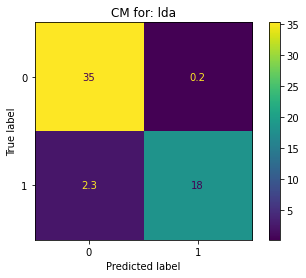

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='qda', acc=0.9589, sens=0.3613, spec=0.9662, prec=0.9417, rec=0.9463, f1_score=0.9440, mcc=0.9116


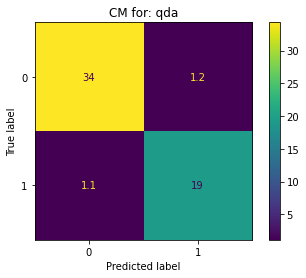

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='cart', acc=0.9268, sens=0.3526, spec=0.9465, prec=0.9059, rec=0.8927, f1_score=0.8993, mcc=0.8418


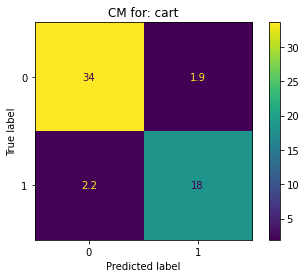

In [11]:
folds = 10
test_indexs = np.random.choice(range(folds), folds, replace=False)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
# models = ['lda', 'qda', 'cart', 'log_reg']
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for i in range(folds):
        train_X = deepcopy(X)
        train_y = deepcopy(y)
        index = test_indexs[i]
        test_range = range((index*fold_size),((index+1)*fold_size))
        test_X = X[test_range, :]
        test_y = y[test_range]
        train_X = np.delete(train_X, test_range, axis=0)
        train_y = np.delete(train_y, test_range)
        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
                                display_labels=model.classes_)
    disp.plot()
    plt.title(f'CM for: {x}')
    plt.show()
    



fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='lda', acc=0.9578, sens=0.3486, spec=0.9944, prec=0.9896, rec=0.8962, f1_score=0.9406, mcc=0.9107


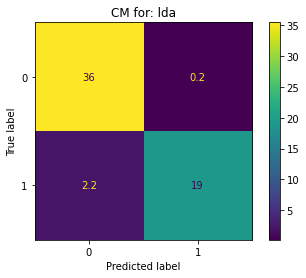

fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='qda', acc=0.9578, sens=0.3688, spec=0.9636, prec=0.9393, rec=0.9481, f1_score=0.9437, mcc=0.9100


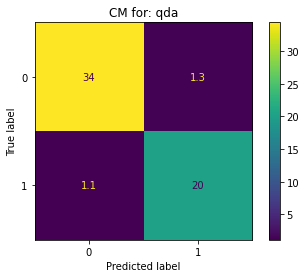

fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='cart', acc=0.9315, sens=0.3642, spec=0.9440, prec=0.9061, rec=0.9104, f1_score=0.9082, mcc=0.8535


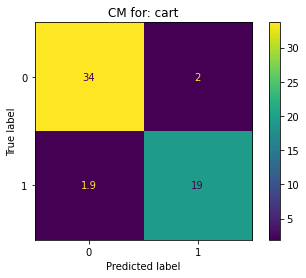

In [17]:
# stratified cv
folds = 10
skf = StratifiedKFold(n_splits=10, shuffle=True)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for train_index, test_index in skf.split(X, y):
        train_X, test_X = X[train_index], X[test_index]
        train_y, test_y = y[train_index], y[test_index]

        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
                               display_labels=model.classes_)
    disp.plot()
    plt.title(f'CM for: {x}')
    plt.show()




THEME: Detecting mislabeled observations

In [18]:
model1_roc_scores = []
model2_roc_scores = []
model3_roc_scores = []
model1_f1_scores = []
model2_f1_scores = []
model3_f1_scores = []
ps = np.round(np.linspace(0, int(35*5.69), 20))
n_of_tries = 100
for p in ps:
    model1_roc_score = 0
    model2_roc_score = 0
    model3_roc_score = 0
    model1_f1_score = 0
    model2_f1_score = 0
    model3_f1_score = 0
    model2 = LogisticRegression() # <- Change here for different model 
    model1 = LogisticRegression()
    for _ in range(n_of_tries):
        cutoff = int(len(y)*0.75)
        X_train, X_test, y_train, y_test = train_test_split(
                X, y, stratify=y, test_size=0.25)

        change_indexes = np.random.choice(cutoff, int(p), replace=False)
        y_train_change = deepcopy(y_train)
        for i in change_indexes:
            y_train_change[i] = (y_train_change[i]+1) % 2
        
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train_change)
        prediction1 = model1.predict(X_train)
        prediction2 = model2.predict(X_train)
        prediction3 = model2.predict(X_test)

        model1_roc_score += recall_score(prediction1, y_train, average='weighted')
        model2_roc_score += recall_score(prediction2, y_train_change, average='weighted')
        model3_roc_score += recall_score(prediction3, y_test, average='weighted')
        model1_f1_score += recall_score(prediction1, y_train)
        model2_f1_score += recall_score(prediction2, y_train_change)
        model3_f1_score += recall_score(prediction3, y_test)
        
    model1_roc_score /= n_of_tries
    model2_roc_score /= n_of_tries
    model3_roc_score /= n_of_tries
    model1_roc_scores.append(model1_roc_score)
    model2_roc_scores.append(model2_roc_score)
    model3_roc_scores.append(model3_roc_score)
    model1_f1_scores.append(model1_f1_score)
    model2_f1_scores.append(model2_f1_score)
    model3_f1_scores.append(model3_f1_score)



C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\anton\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

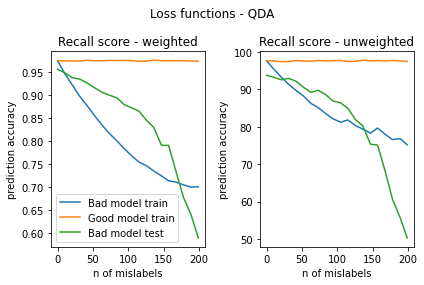

In [14]:
fig , (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Loss functions - QDA')
ax1.plot(ps, np.array(model2_roc_scores), label='Bad model train')
ax1.plot(ps, model1_roc_scores, label='Good model train')
ax1.plot(ps, model3_roc_scores, label='Bad model test')
ax1.set_xlabel('n of mislabels')
ax1.set_ylabel('prediction accuracy')
ax1.legend()
ax1.set_title('Recall score - weighted')
ax2.plot(ps, np.array(model2_f1_scores), label='Bad model train')
ax2.plot(ps, model1_f1_scores, label='Good model train')
ax2.plot(ps, model3_f1_scores, label='Bad model test')
ax2.set_xlabel('n of mislabels')
ax2.set_ylabel('prediction accuracy')
ax2.set_title('Recall score - unweighted')
plt.tight_layout()
plt.show()

THEME A Part 4

In [34]:
from sklearn.utils import resample
from scipy.sparse import coo_matrix

ps = np.round(np.linspace(0, int(35*5.69), 10))

n_of_tries = 1000

pred_errors_averaged = []
conf_values_averaged = []
for p in ps:
    pred_errors = []
    conf_values = []
    change_indexes = np.random.choice(cutoff, int(p), replace=False)
    y_train_change = deepcopy(y_train)
    for i in change_indexes:
        y_train_change[i] = (y_train_change[i] + 1) % 2
    for _ in range(10):
        count = np.zeros(len(y))
        count_always = np.zeros(len(y))
        predicted_value = np.zeros(len(y))
        confidence_value = np.zeros(len(y))
        prediction_error = np.zeros(len(y))
        model = QuadraticDiscriminantAnalysis() # <- change here for different model
        
        for _ in range(n_of_tries):
            cutoff = int(len(y)*0.75)
            n_test_values = int(0.25*len(y))
            test_indexes = np.random.choice(len(y), n_test_values, replace=False)
            test_indexes = np.sort(test_indexes)

            X_test = np.array([x for i, x in enumerate(X) if i in test_indexes])
            y_test = np.array([(i, x) for i, x in enumerate(y) if i in test_indexes])
            X_train = np.array([x for i, x in enumerate(X) if i not in test_indexes])
            y_train = np.array([x for i, x in enumerate(y) if i not in test_indexes])
            
        
            

            model = model.fit(X_train, y_train_change)
            prediction = model.predict(X_test)
            for i, x in enumerate(y_test):    
                count[x[0]] += prediction[i]
                count_always[x[0]] += 1
            
        for i in range(len(y)):
            frac = count[i]/count_always[i]
            round_frac = np.round(frac)
            predicted_value[i] = round_frac
            if round_frac < 1:
                confidence_value[i] = 1-frac
            else:
                confidence_value[i] = frac
            
            if round_frac != y[i]:
                prediction_error[i] = 1


        tot_conf_value = np.mean(confidence_value)
        tot_pred_error = sum(prediction_error)/len(y)
        conf_values.append(tot_conf_value)
        pred_errors.append(tot_pred_error)
    pred_errors_averaged.append(np.mean(pred_errors))
    conf_values_averaged.append(np.mean(conf_values))




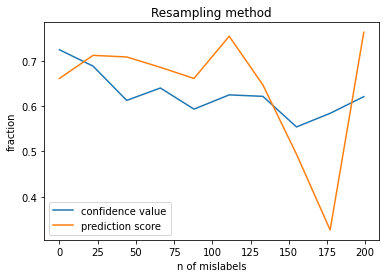

In [33]:
plt.plot(ps, conf_values_averaged, label='confidence value')
plt.plot(ps, 1-np.array(pred_errors_averaged), label='prediction score')
plt.title('Resampling method')
plt.legend()
plt.xlabel('n of mislabels')
plt.ylabel('fraction')
plt.show()